Assesmnet CLO-3: Tugas Pemrograman Learning

Topik Klasifikasi pada Ecoli menggunakan KNN

Kelompok:
Anggota:
1.   Wiraldy Manggala Simanjuntak (130122)
2.   Rangga Aditya Nugraha (1301223106)
3.   Helmi Qushayyi Hakim (1301220263)

Pendahuluan
Di zaman modern ini, penerapan metode pembelajaran mesin dalam penelitian biologi molekuler  semakin penting, terutama dalam klasifikasi spesies bakteri Ecoli. Escherichia coli merupakan bakteri yang umum ditemukan di lingkungan dan di usus besar manusia dan hewan, serta berperan penting dalam penelitian biologi molekuler dan bioteknologi. Metode K-Nearest Neighbor (KNN) dapat digunakan untuk menganalisis Ecoli berdasarkan sifat genetik dan fenotipiknya. KNN adalah teknik nonparametrik yang efektif untuk mengklasifikasikan sampel berdasarkan kedekatannya dalam ruang fitur. Tujuan dari tugas pemrograman ini adalah untuk mengimplementasikan metode KNN untuk mengklasifikasikan strain Ecoli menggunakan dataset yang tersedia, mengevaluasi kinerja model menggunakan metrik akurasi, presisi, dan recall, serta menentukan kepercayaan pada hasil klasifikasi menjamin seksualitas.




**Import Libraries dan Data**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data = pd.read_csv('https://archive.ics.uci.edu/static/public/39/data.csv')
data

,Sequence,mcg,gvh,lip,chg,aac,alm1,alm2,class
0,AAT_ECOLI,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,ACEA_ECOLI,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,ACEK_ECOLI,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,ACKA_ECOLI,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,ADI_ECOLI,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp
...,...,...,...,...,...,...,...,...,...
331,TREA_ECOLI,0.74,0.56,0.48,0.5,0.47,0.68,0.30,pp
332,UGPB_ECOLI,0.71,0.57,0.48,0.5,0.48,0.35,0.32,pp
333,USHA_ECOLI,0.61,0.60,0.48,0.5,0.44,0.39,0.38,pp
334,XYLF_ECOLI,0.59,0.61,0.48,0.5,0.42,0.42,0.37,pp


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sequence  336 non-null    object 
 1   mcg       336 non-null    float64
 2   gvh       336 non-null    float64
 3   lip       336 non-null    float64
 4   chg       336 non-null    float64
 5   aac       336 non-null    float64
 6   alm1      336 non-null    float64
 7   alm2      336 non-null    float64
 8   class     336 non-null    object 
dtypes: float64(7), object(2)
memory usage: 23.8+ KB


In [ ]:
data.describe()

,mcg,gvh,lip,chg,aac,alm1,alm2
count,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000
mean,0.500060,0.500000,0.495476,0.501488,0.500030,0.500179,0.499732
std,0.194634,0.148157,0.088495,0.027277,0.122376,0.215751,0.209411
min,0.000000,0.160000,0.480000,0.500000,0.000000,0.030000,0.000000
25%,0.340000,0.400000,0.480000,0.500000,0.420000,0.330000,0.350000
50%,0.500000,0.470000,0.480000,0.500000,0.495000,0.455000,0.430000
75%,0.662500,0.570000,0.480000,0.500000,0.570000,0.710000,0.710000
max,0.890000,1.000000,1.000000,1.000000,0.880000,1.000000,0.990000


In [ ]:
print(data.isnull().sum())

Sequence    0
mcg         0
gvh         0
lip         0
chg         0
aac         0
alm1        0
alm2        0
class       0
dtype: int64


**Preprocessing**

In [ ]:
data = pd.read_csv('https://archive.ics.uci.edu/static/public/39/data.csv')

data = data.sample(20).reset_index(drop=True)

data1 = data.drop('Sequence', axis=1)

data2 = data1.drop('class', axis=1)

In [ ]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [ ]:
data_normalized = normalize(data2)

**EDA (Exploratory Data Analysis)**

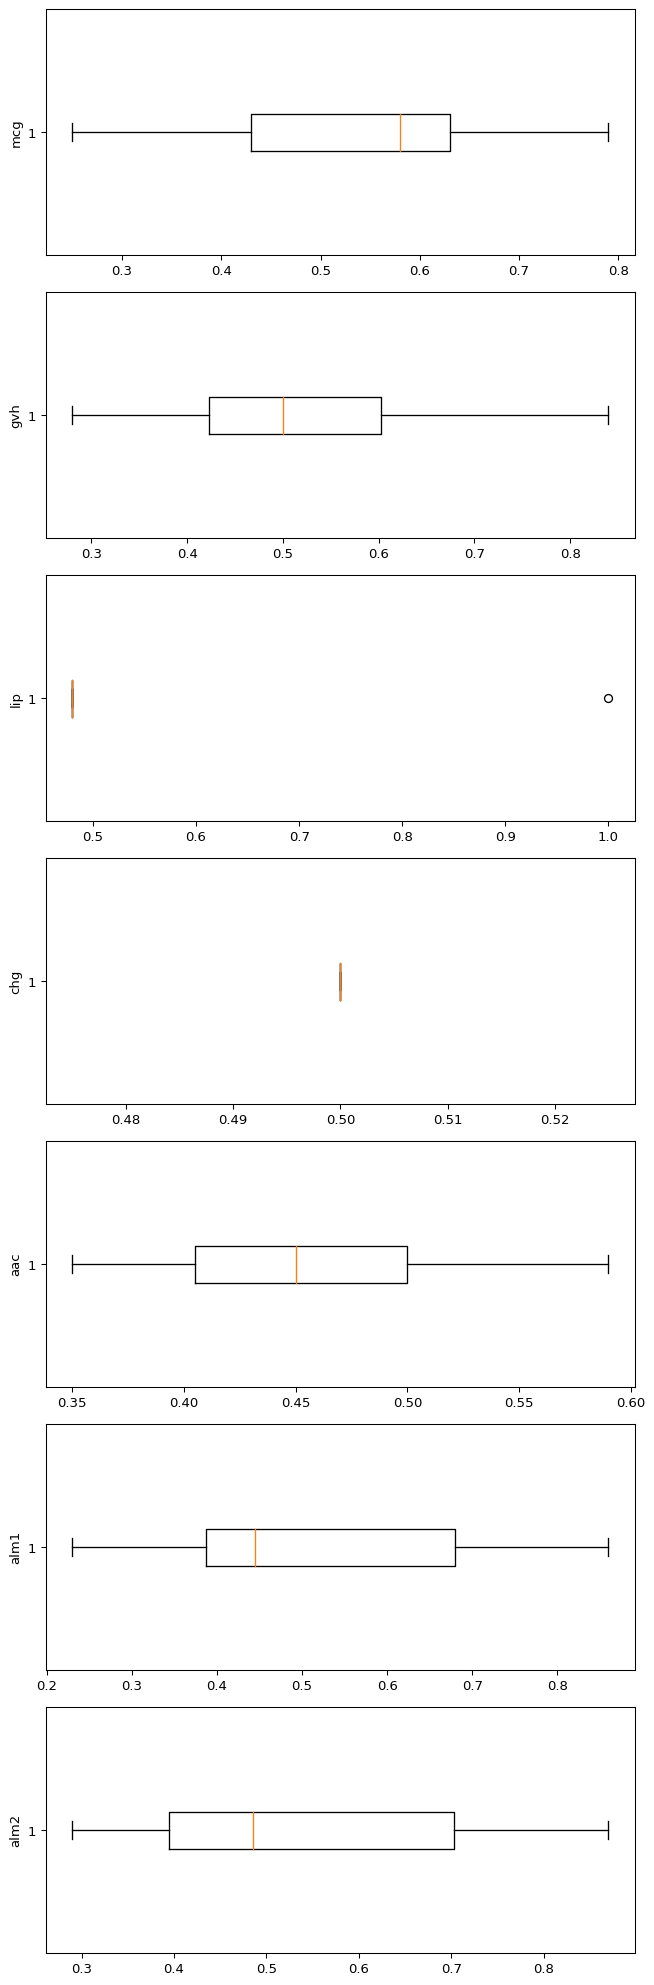

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

num_columns = len(data2.columns)
fig, axs = plt.subplots(num_columns, 1, dpi=95, figsize=(7, 3 * num_columns))
if num_columns == 1:
    axs = [axs]
for i, col in enumerate(data2.columns):
    axs[i].boxplot(data2[col], vert=False)
    axs[i].set_ylabel(col)
plt.tight_layout()
plt.show()

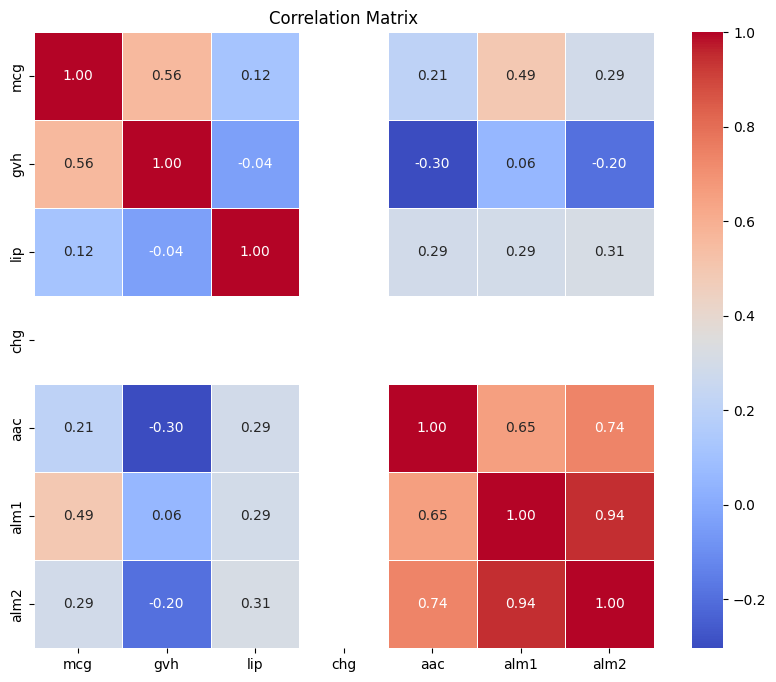

In [ ]:
correlation_matrix = data_normalized.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

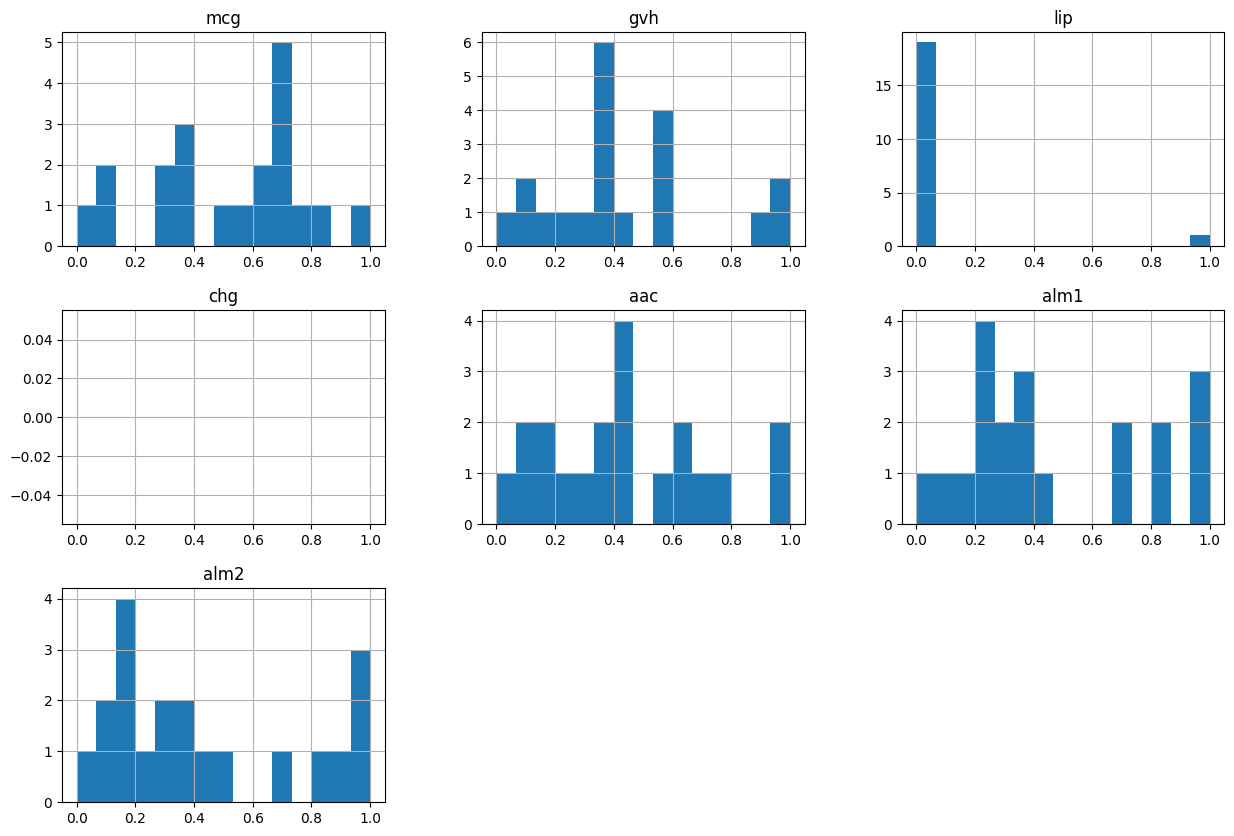

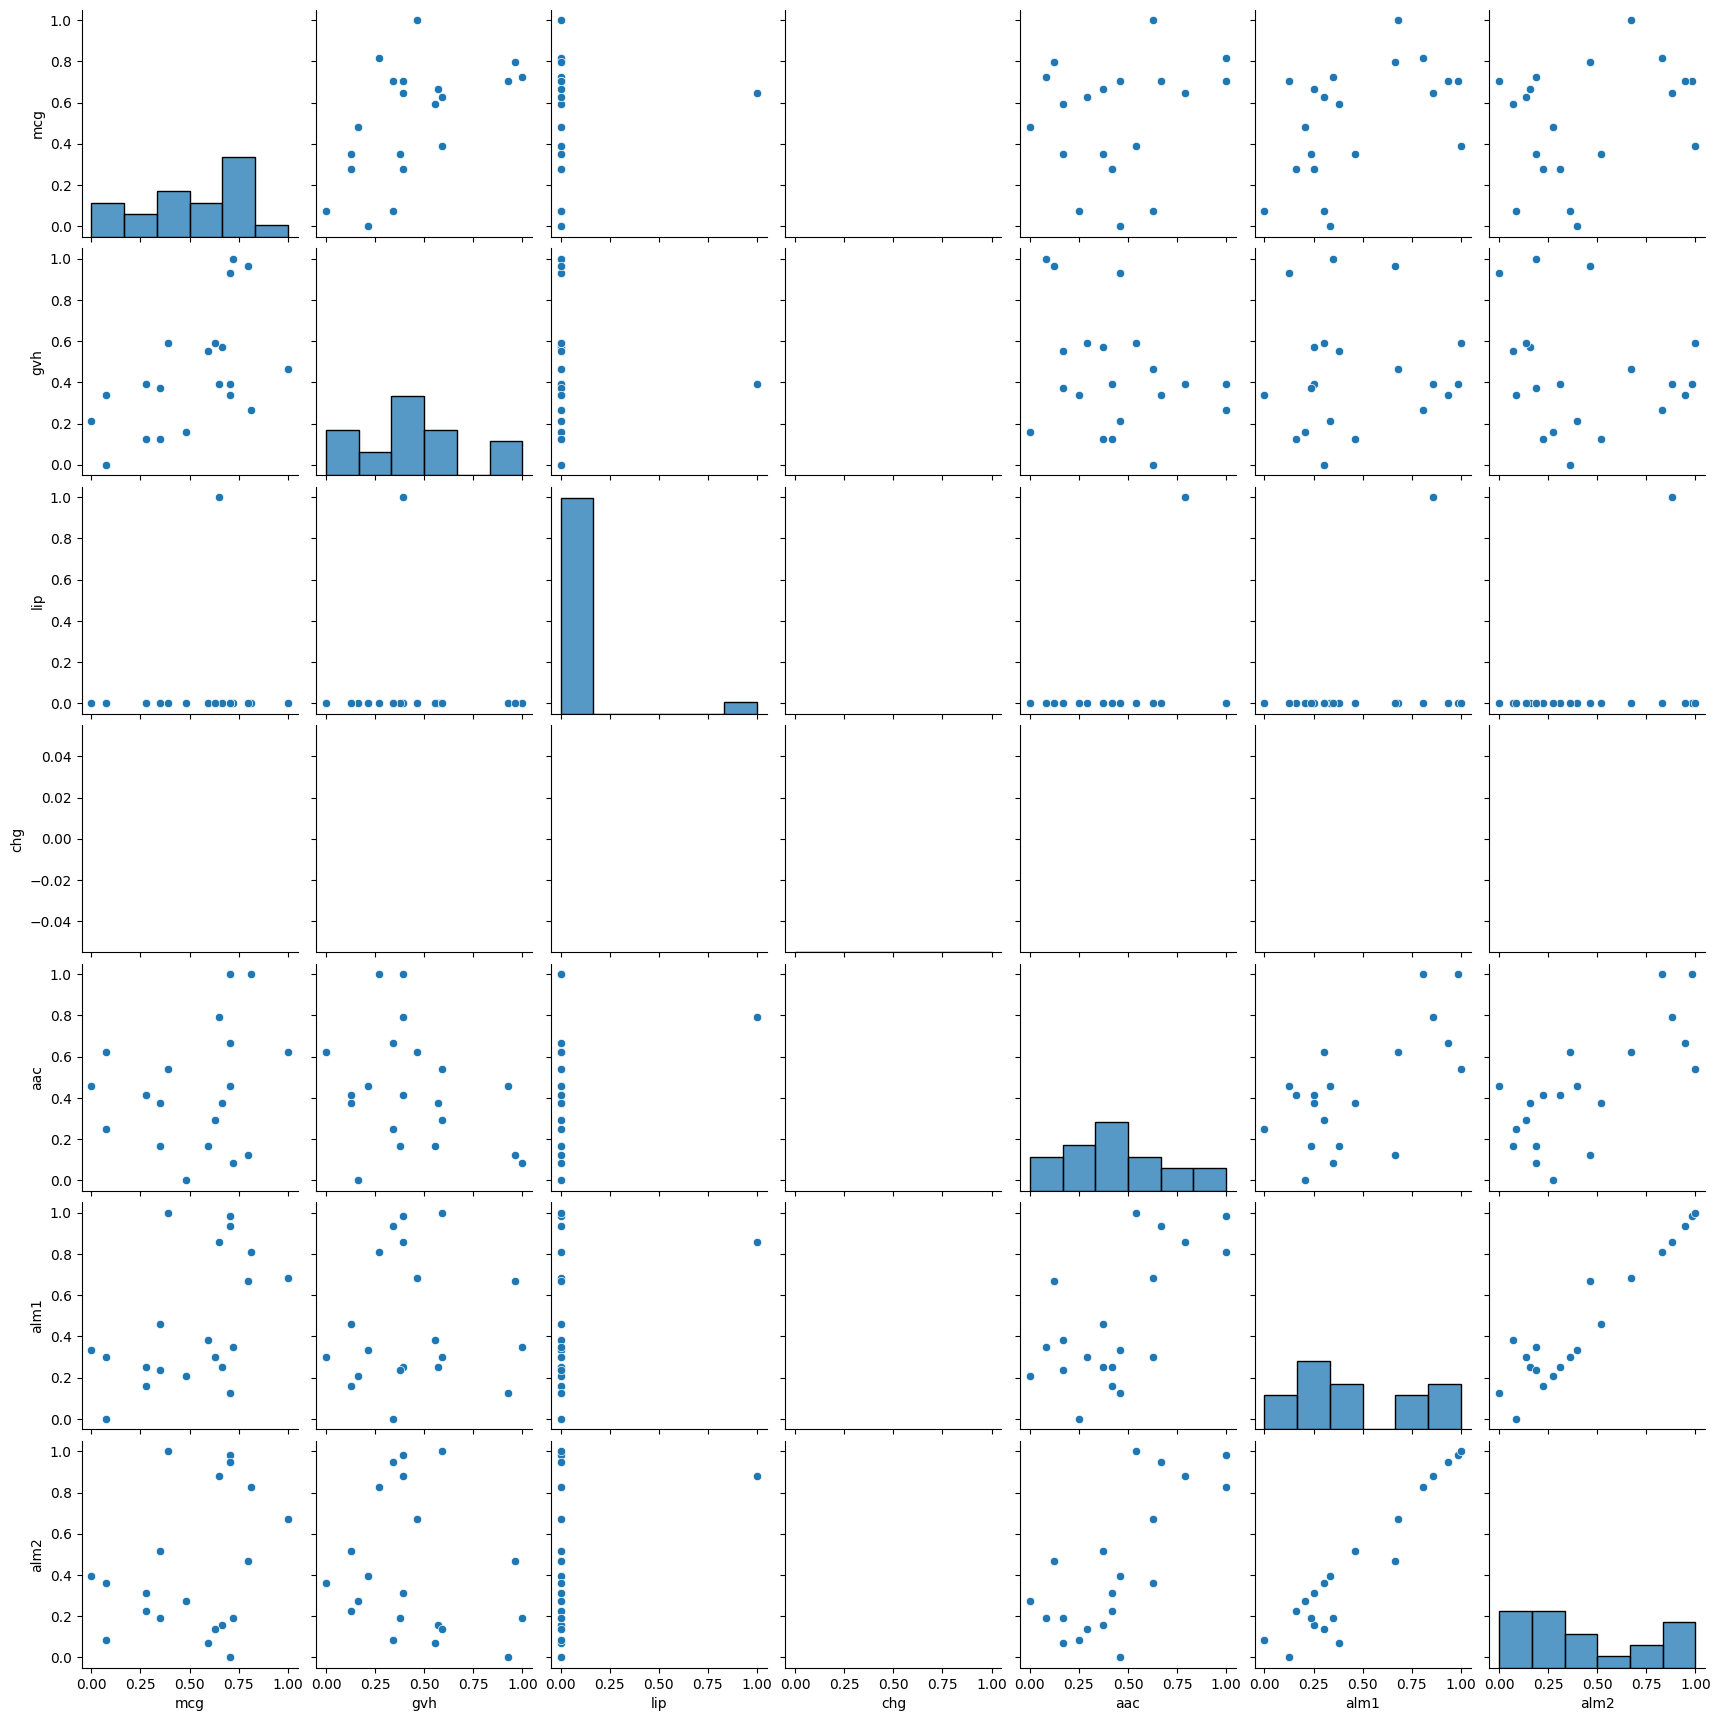

In [ ]:
data_normalized.hist(bins=15, figsize=(15, 10))
plt.show()

sns.pairplot(data_normalized)
plt.show()

**Pembagian Data**

In [ ]:
test_ratio = 0.2
num_test = int(test_ratio * len(data))
np.random.seed(42)
test_indices = np.random.choice(len(data), num_test, replace=False)
mask = np.ones(len(data), dtype=bool)
mask[test_indices] = False
train_data = data[mask]
test_data = data[~mask]

Metode yang digunakan adalah KNN.
Kenapa kami menggunakan metode ini karena KNN adalah metode non-parametrik yang tidak memerlukan asumsi distribusi data, sehingga efektif untuk data biologis yang kompleks. Metode ini bekerja dengan mengklasifikasikan sampel berdasarkan kedekatan dengan sampel pelatihan terdekat, menangkap pola lokal dalam data seperti variasi genetik. KNN juga mudah diimplementasikan dan dapat menangani berbagai jenis fitur, baik numerik maupun kategorikal, menjadikannya pilihan yang tepat untuk klasifikasi strain Ecoli berdasarkan karakteristik yang tersedia.

**Implementasi Model**

In [ ]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def knn_predict(X_train, y_train, x_test, k):
    distances = [euclidean_distance(x_test, x_train) for x_train in X_train]
    k_indices = np.argsort(distances)[:k]
    k_nearest_labels = [y_train[i] for i in k_indices]
    return max(set(k_nearest_labels), key=k_nearest_labels.count)

In [ ]:
X_train = train_data.drop(['class', 'Sequence'], axis=1).values
y_train = train_data['class'].values
X_test = test_data.drop(['class', 'Sequence'], axis=1).values
y_test = test_data['class'].values

In [ ]:
import pickle

model_data = {
    'X_train': X_train,
    'y_train': y_train,
}

with open('knn_model.pkl', 'wb') as file:
    pickle.dump(model_data, file)

print("Model KNN telah disimpan.")


Model KNN telah disimpan.


**Evaluasi Model**

In [ ]:
k = 3
sample_index = np.random.randint(len(X_test))
sample = X_test[sample_index]
predicted_class = knn_predict(X_train, y_train, sample, k)
print("Predicted Class:", predicted_class)
print("True Class:", y_test[sample_index])

Predicted Class: cp
True Class: cp


In [ ]:
def accuracy_score(y_true, y_pred):
    correct = 0
    for true, pred in zip(y_true, y_pred):
        if true == pred:
            correct += 1
    return correct / len(y_true)

y_pred = [knn_predict(X_train, y_train, x_test, k) for x_test in X_test]
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi KNN:", accuracy)

Akurasi KNN: 0.75


In [ ]:
import numpy as np

def precision_recall_f1(y_true, y_pred, classes):
    precision = {}
    recall = {}
    f1_score = {}
    support = {}

    for cls in classes:
        tp = sum((y_true == cls) & (y_pred == cls))
        fp = sum((y_true != cls) & (y_pred == cls))
        fn = sum((y_true == cls) & (y_pred != cls))

        precision[cls] = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall[cls] = tp / (fn + tp) if (fn + tp) > 0 else 0
        f1_score[cls] = (2 * precision[cls] * recall[cls]) / (precision[cls] + recall[cls]) if (precision[cls] + recall[cls]) > 0 else 0
        support[cls] = sum(y_true == cls)

    return precision, recall, f1_score, support

y_true = np.array(y_test)
y_pred = np.array(y_pred)
classes = np.unique(y_true)

precision, recall, f1, support = precision_recall_f1(y_true, y_pred, classes)

for label in classes:
    print(f"Class {label}:")
    print(f"  Precision: {precision[label]:.2f}")
    print(f"  Recall: {recall[label]:.2f}")
    print(f"  F1-score: {f1[label]:.2f}")
    print(f"  Support: {support[label]:.2f}")


Class cp:
  Precision: 1.00
  Recall: 1.00
  F1-score: 1.00
  Support: 1.00
Class im:
  Precision: 0.50
  Recall: 1.00
  F1-score: 0.67
  Support: 1.00
Class imU:
  Precision: 0.00
  Recall: 0.00
  F1-score: 0.00
  Support: 1.00
Class pp:
  Precision: 1.00
  Recall: 1.00
  F1-score: 1.00
  Support: 1.00


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1 0 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 0 0 1]]


Dalam proyek ini, kami berhasil menerapkan metode K-Nearest Neighbor (KNN) untuk mengklasifikasikan strain Ecoli. Kami memulai dengan mengimpor kumpulan data, menjelajahi data, dan menormalkannya.
Langkah-langkah utamanya adalah:
1.   Membaca dan mengeksplorasi data: Data diimpor dari sumber eksternal dan
diperiksa untuk memahami distribusi dan mengidentifikasi nilai yang hilang.
2.   Pengambilan Sampel dan Normalisasi: Ambil sampel acak dari data yang ada dan normalkan fitur-fiturnya sehingga semua fitur berada pada skala yang sama.
3.   Visualisasi Data: Plot kotak dan heat map korelasi digunakan untuk memahami distribusi data dan hubungan antar fitur. Histogram dan plot berpasangan juga dibuat untuk visualisasi lebih lanjut.
4.   Pemisahan Data: data dibagi menjadi set pelatihan dan set pengujian dengan rasio 80: 20.
5.   Implementasi KNN: Mengimplementasikan fungsi untuk menghitung jarak Euclidean dan melakukan prediksi KNN. Klasifikasi dilakukan dengan memilih kelas mayoritas dari kelas-kelas terdekat.
6.   Evaluasi model : Akurasi model  dihitung dengan membandingkan prediksi ANN dengan kelas sebenarnya di set pengujian.

Hasil implementasi menunjukkan bahwa metode KNN dapat digunakan secara efektif untuk mengklasifikasikan strain Ecoli dengan akurasi yang dapat diterima. Berikut adalah hasil dari beberapa tahapan penting dalam implementasi:
1.   Prediksi KNN: Prediksi untuk sampel acak menunjukkan hasil yang cukup baik dengan kelas yang diprediksi sesuai dengan kelas sebenarnya.
2.   Akurasi Model: Akurasi model dihitung sebesar 0,75%, yang menunjukkan bahwa metode KNN dapat memberikan hasil yang cukup akurat dalam pengklasifikasian strain Ecoli pada dataset ini.